In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from grid_statistics import get_slopes,grid_slopes

In [2]:
g100 = loadmat('ROXSI_grids_all.mat')['G100']
glat = np.rot90(g100['lat'][0][0])
glon = np.rot90(g100['lon'][0][0])
gh = g100['h'][0][0]

In [3]:
data = loadmat('2m_gridded_bath.mat')
h = data['weak_h']
lat = data['lat']
lon = data['lon']

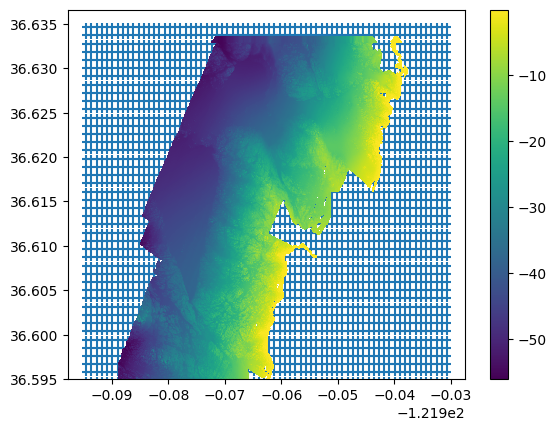

In [4]:
i_min,i_max = 91,135
j_min,j_max = 70,140

plt.scatter(glon[i_min:i_max,j_min:j_max],glat[i_min:i_max,j_min:j_max],marker="+")
a=plt.pcolormesh(lon,lat,h)
plt.colorbar(a)

In [5]:
slopes = get_slopes(h,res=2)

In [6]:
X = np.zeros((len(h.flatten()),2))
X[:,0] = lon.flatten()
X[:,1] = lat.flatten()

idxs = ~np.isnan(slopes.flatten())

In [7]:
results = grid_slopes(glat[i_min:i_max,j_min:j_max],glon[i_min:i_max,j_min:j_max],slopes.flatten()[idxs],X[idxs,:])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


Text(0.5, 1.0, 'Sigma Slopes')

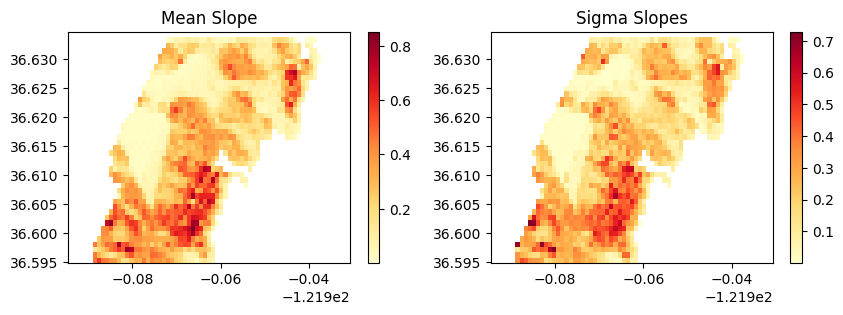

In [8]:
fig,ax = plt.subplots(1,2,figsize=(10,3))

a=ax[0].pcolormesh(glon[i_min:i_max,j_min:j_max],glat[i_min:i_max,j_min:j_max],results[0],cmap = 'YlOrRd')
plt.colorbar(a)
ax[0].set_title('Mean Slope')
b=ax[1].pcolormesh(glon[i_min:i_max,j_min:j_max],glat[i_min:i_max,j_min:j_max],results[1],cmap='YlOrRd')
plt.colorbar(b)
ax[1].set_title('Sigma Slopes')

In [9]:
from scipy.io import savemat

In [10]:
out ={'means':results[0],'stds':results[1],'lon':glon[i_min:i_max,j_min:j_max],'lat':glat[i_min:i_max,j_min:j_max]}

savemat('zprime_slopesG100.mat',out)